### Check for GPU avaliability and filter PyTorch warnings

In [1]:
import torch
import warnings
warnings.filterwarnings("ignore", "You are using `torch.load` with `weights_only=False`*.")

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

PyTorch version: 2.4.1+cu121
CUDA available: True
GPU device: NVIDIA GeForce RTX 3070 Ti
Device: cuda


### Download the EMNIST dataset and save it as PyTorch tensors

Saving dataset to datasets/emnist

Dataset saved with shapes:
Training images: torch.Size([240000, 1, 28, 28])
Training labels: torch.Size([240000])
Test images: torch.Size([40000, 1, 28, 28])
Test labels: torch.Size([40000])


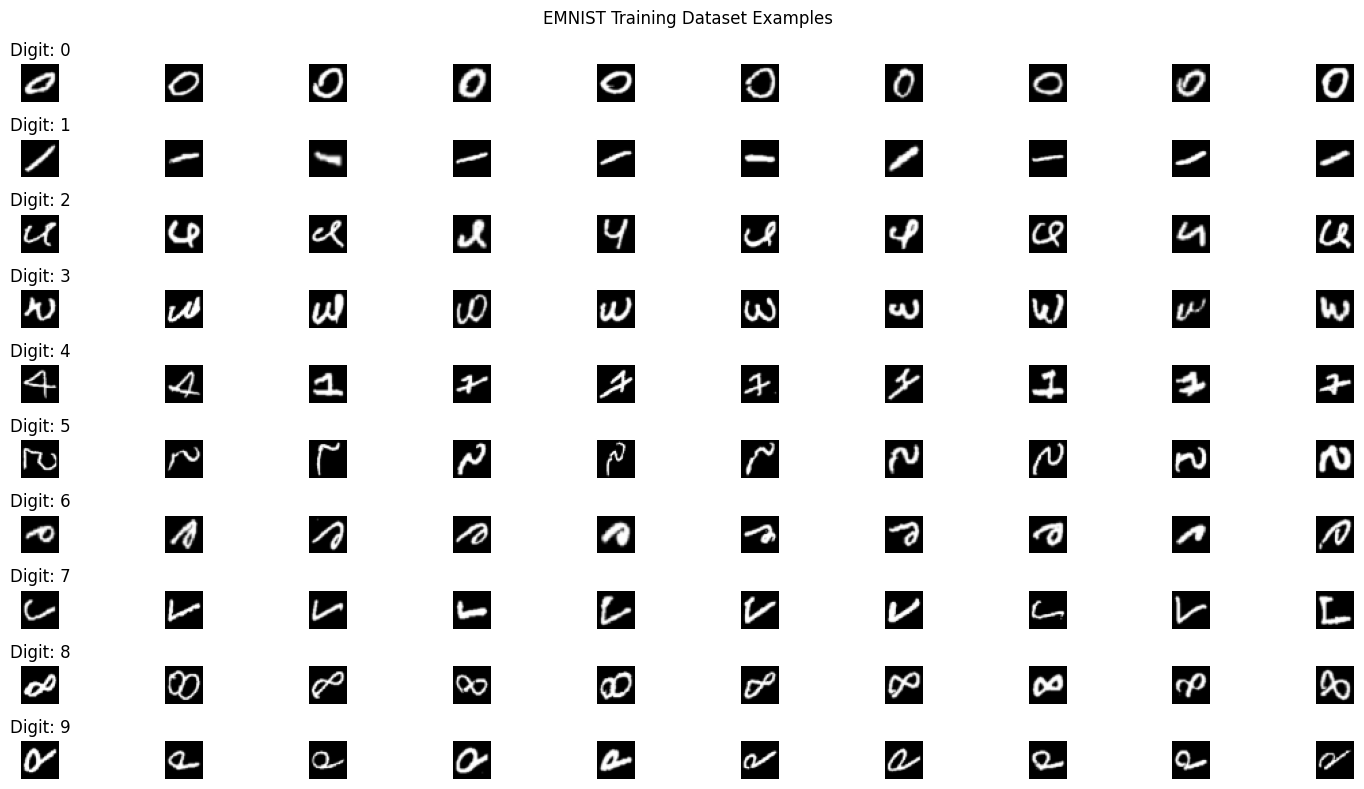

In [2]:
from emnist_download import prepare_emnist_dataset
train_images, train_labels, test_images, test_labels = prepare_emnist_dataset()

### Augment the EMNIST dataset 9 times (to create a dataset 10x EMNIST)

Loading existing augmented datasets...

Dataset shape:
Training images: torch.Size([2400000, 1, 28, 28])
Training labels: torch.Size([2400000])


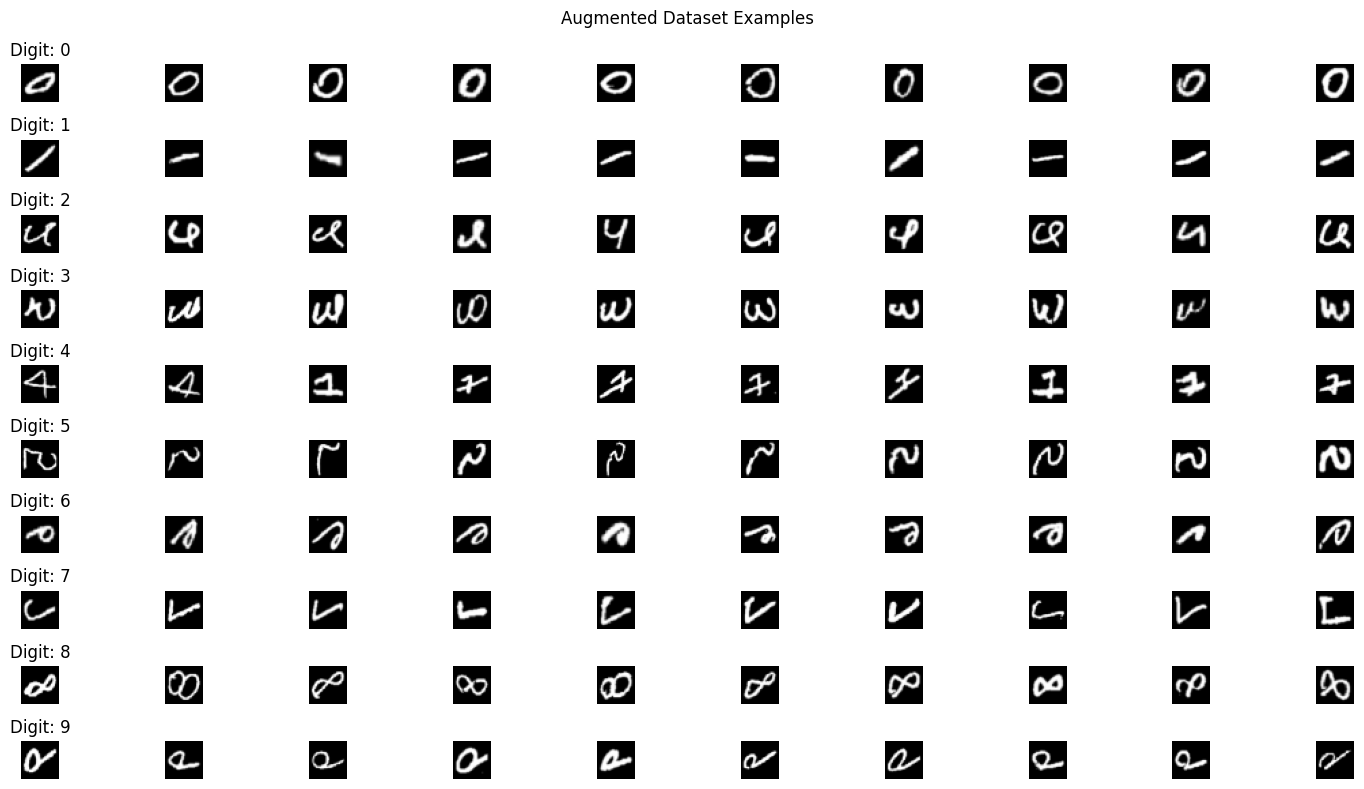

In [3]:
from dataset_augmenter import augment_emnist_dataset

augmented_images, augmented_labels = augment_emnist_dataset()

### Create your own MNIST-like dataset

Dataset already exists, loading...
Dataset loaded successfully!
Images tensor shape: torch.Size([10000, 1, 28, 28])
Labels tensor shape: torch.Size([10000])


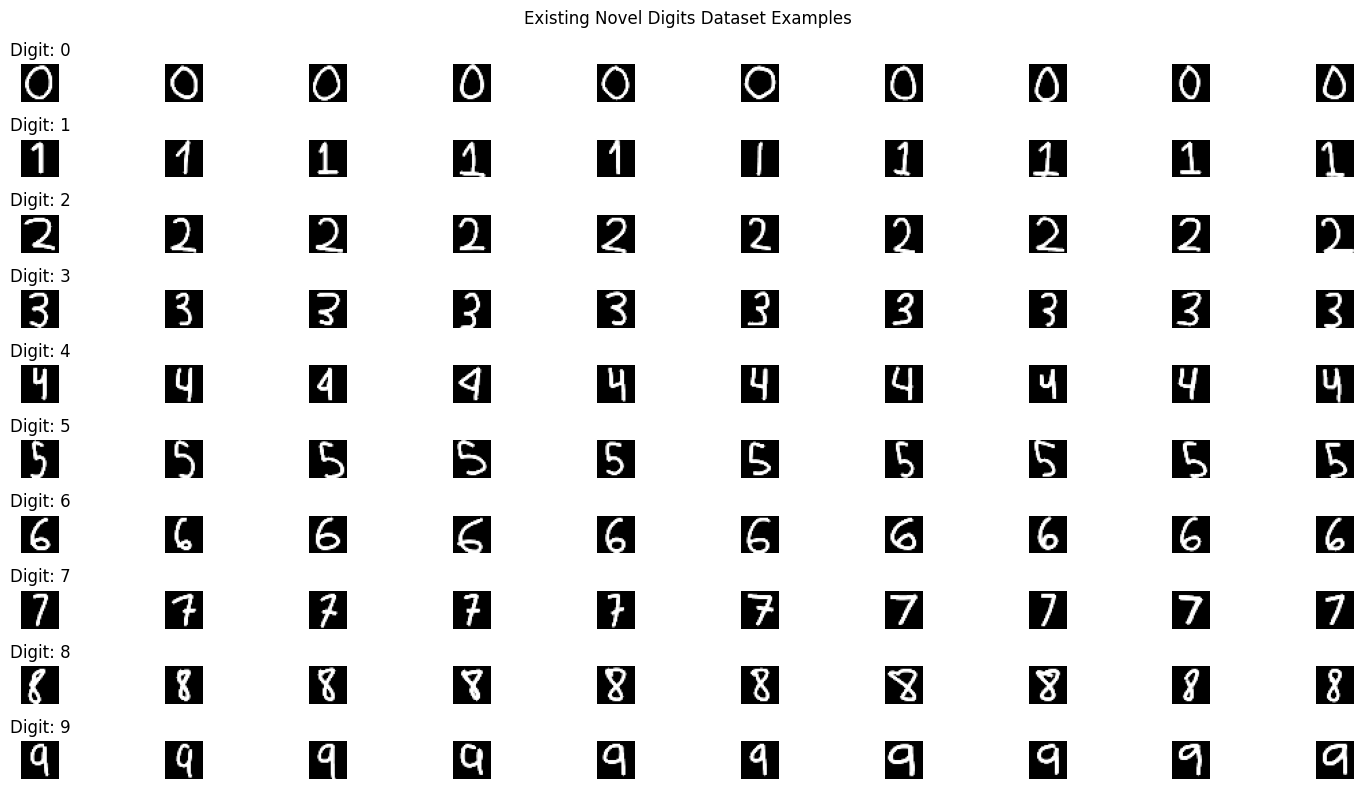

In [4]:
from novel_digits import create_or_load_novel_digits_dataset
novel_dataset = create_or_load_novel_digits_dataset()

### Train basic NN model on EMNIST

In [5]:
from train import train_model

model = train_model("basenn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train partial CNN model on EMNIST

In [6]:
from train import train_model

model = train_model("partialcnn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train full CNN model on EMNIST

In [7]:
from train import train_model

model = train_model("fullcnn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train RNN model on EMNIST

In [8]:
from train import train_model

model = train_model("rnn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train NN model on augmented EMNIST

In [9]:
from train import train_model

model = train_model("basenn", use_augmentation=True)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train partial CNN model on augmented EMNIST

In [10]:
from train import train_model

model = train_model("partialcnn", use_augmentation=True)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train full CNN model on augmented EMNIST

In [11]:
from train import train_model

model = train_model("fullcnn", use_augmentation=True)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train RNN model on augmented EMNIST

In [12]:
from train import train_model

model = train_model("rnn", use_augmentation=True)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Test NN model (trained on original EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/basenn/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4000
           1       0.99      1.00      1.00      4000
           2       0.99      0.99      0.99      4000
           3       0.99      0.98      0.99      4000
           4       0.99      0.99      0.99      4000
           5       0.99      0.99      0.99      4000
           6       0.99      0.99      0.99      4000
           7       0.99      0.99      0.99      4000
           8       0.99      0.99      0.99      4000
           9       0.99      0.99      0.99      4000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



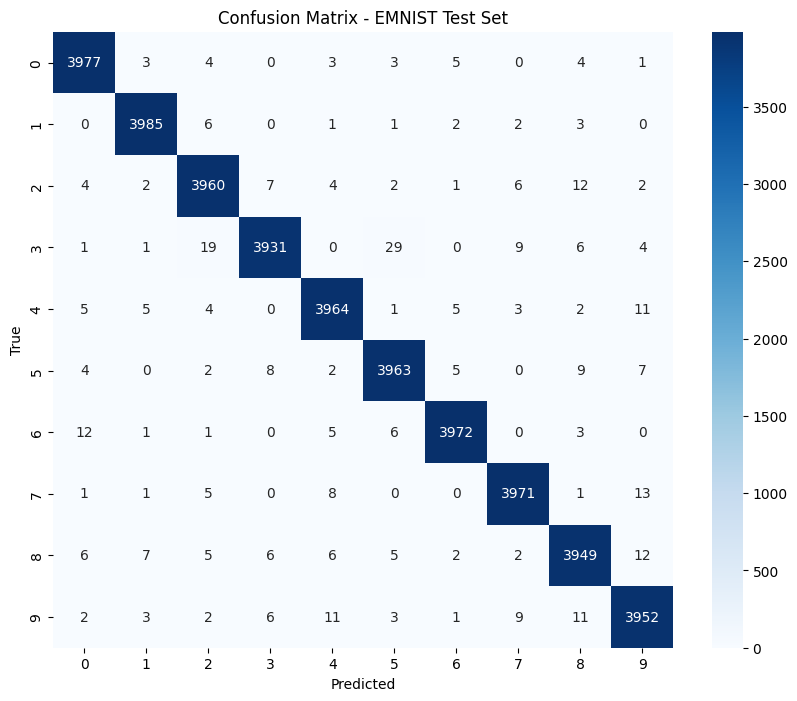


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 13.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67      1000
           1       0.00      0.00      0.00      1000
           2       0.09      0.30      0.13      1000
           3       0.00      0.00      0.00      1000
           4       0.10      0.20      0.13      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.01      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.13     10000
   macro avg       0.08      0.13      0.09     10000
weighted avg       0.08      0.13      0.09     10000



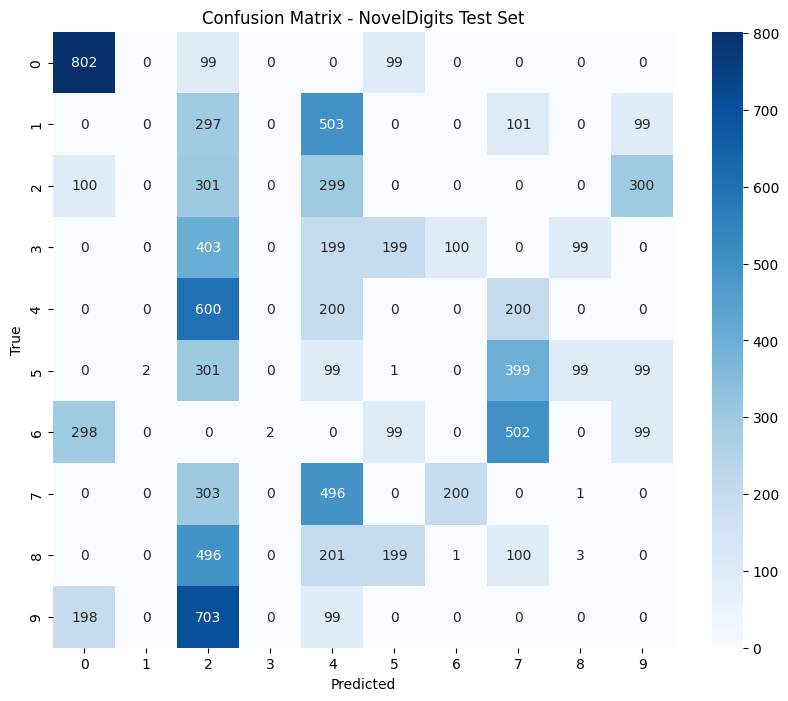


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.06%
NovelDigits Accuracy: 13.07%


In [13]:
from test import test_model

test_model("basenn")

### Test Partial CNN model (trained on original EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/partialcnn/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.54%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       1.00      0.99      0.99      4000
           3       0.99      1.00      0.99      4000
           4       1.00      0.99      1.00      4000
           5       1.00      0.99      0.99      4000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       1.00      0.99      0.99      4000
           9       0.99      1.00      0.99      4000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



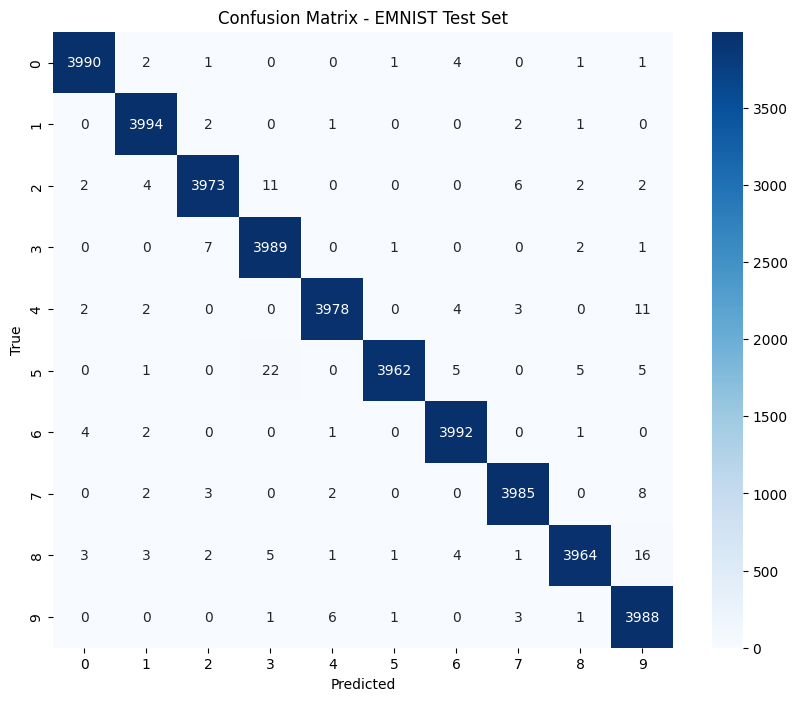


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 12.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.30      1.00      0.47      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.06      0.20      0.10      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.04      0.12      0.06     10000
weighted avg       0.04      0.12      0.06     10000



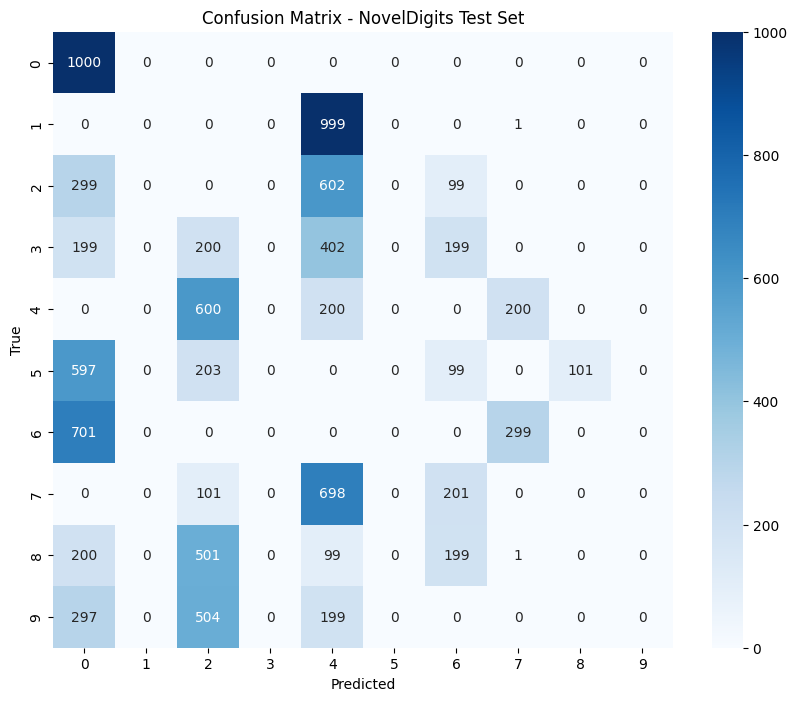


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.54%
NovelDigits Accuracy: 12.00%


In [14]:
from test import test_model

test_model("partialcnn")

### Test Full CNN model (trained on original EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/fullcnn/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.56%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       0.99      1.00      1.00      4000
           3       1.00      0.99      1.00      4000
           4       0.99      1.00      0.99      4000
           5       1.00      0.99      1.00      4000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       1.00      0.99      0.99      4000
           9       0.99      1.00      0.99      4000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



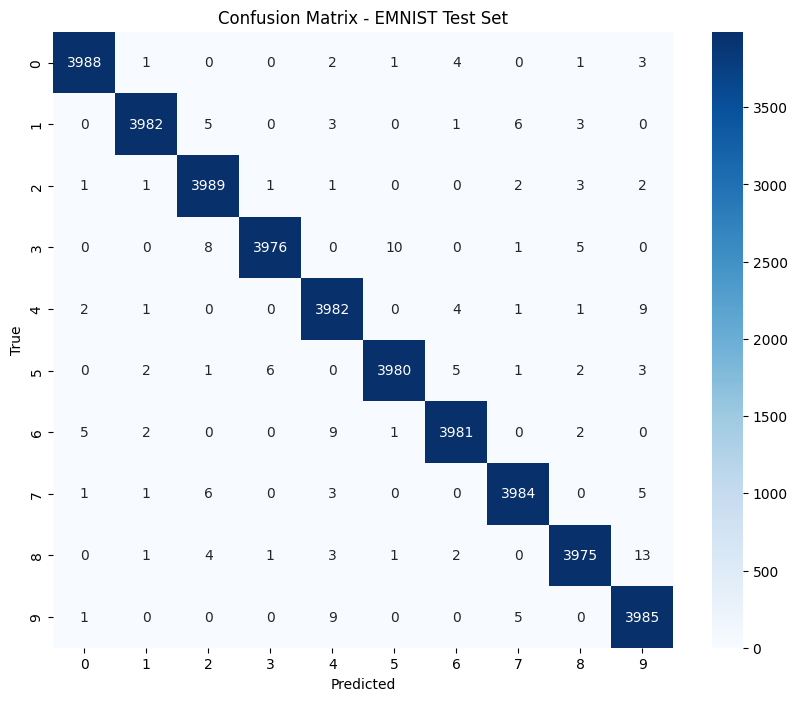


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 14.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.05      0.20      0.08      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.60      0.30      0.40      1000

    accuracy                           0.15     10000
   macro avg       0.11      0.15      0.11     10000
weighted avg       0.11      0.15      0.11     10000



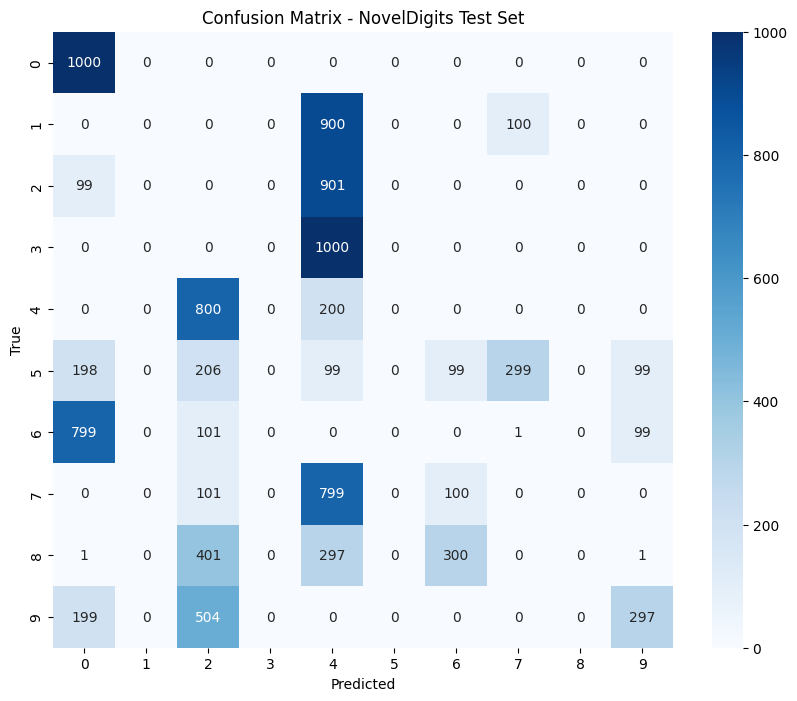


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.56%
NovelDigits Accuracy: 14.97%


In [15]:
from test import test_model

test_model("fullcnn")

### Test RNN model (trained on original EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/rnn/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.41%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       1.00      0.99      0.99      4000
           3       0.99      0.99      0.99      4000
           4       1.00      0.99      0.99      4000
           5       0.99      0.99      0.99      4000
           6       1.00      0.99      0.99      4000
           7       0.99      1.00      0.99      4000
           8       0.99      0.99      0.99      4000
           9       0.99      1.00      0.99      4000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



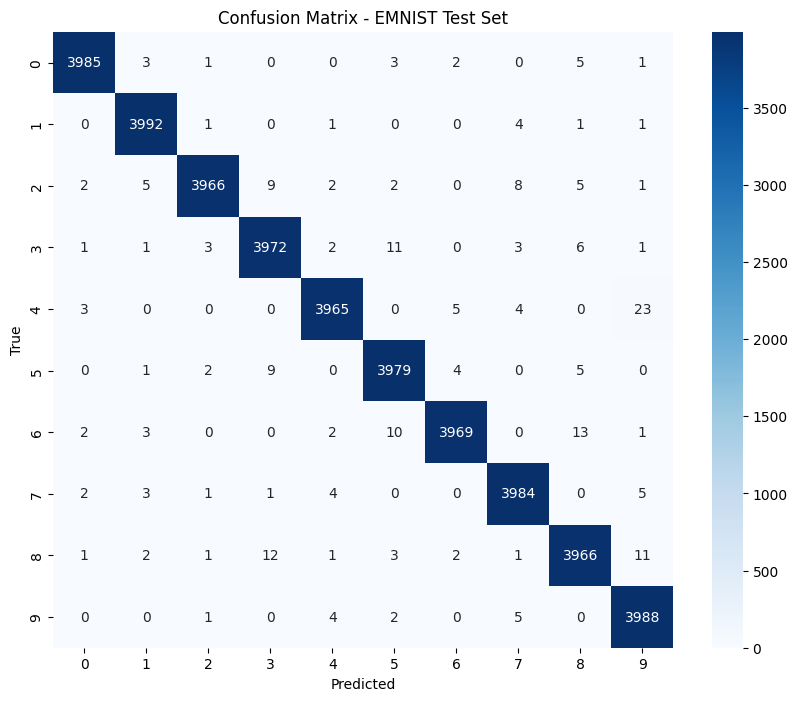


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 11.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.90      0.44      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.06      0.20      0.09      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.04      0.11      0.05     10000
weighted avg       0.04      0.11      0.05     10000



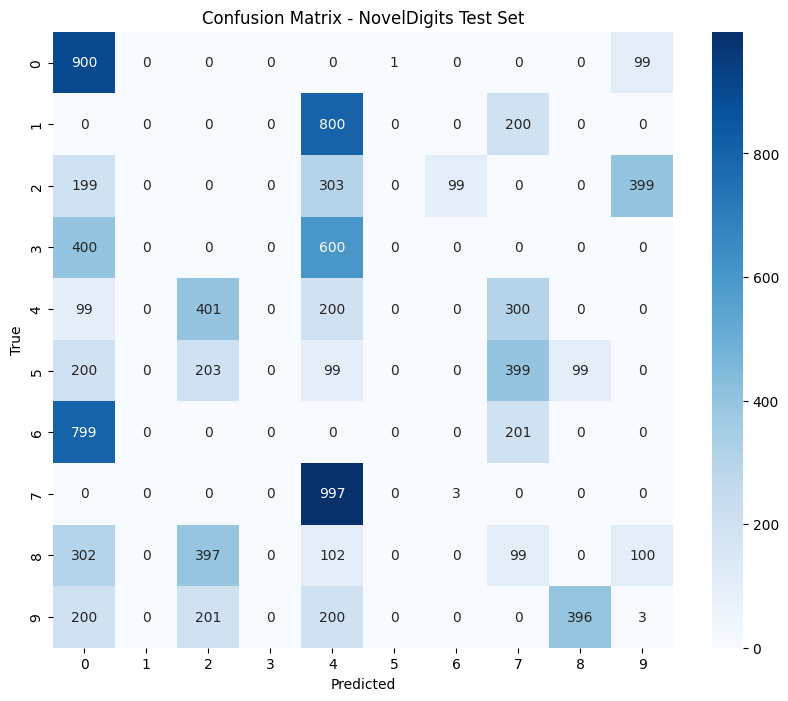


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.41%
NovelDigits Accuracy: 11.03%


In [16]:
from test import test_model

test_model("rnn")

### Test NN model (trained on augmented EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/basenn_augmented/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.40%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4000
           1       0.99      1.00      1.00      4000
           2       0.99      0.99      0.99      4000
           3       0.99      0.99      0.99      4000
           4       0.99      0.99      0.99      4000
           5       0.99      0.99      0.99      4000
           6       1.00      1.00      1.00      4000
           7       0.99      1.00      1.00      4000
           8       0.99      0.99      0.99      4000
           9       0.99      0.99      0.99      4000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



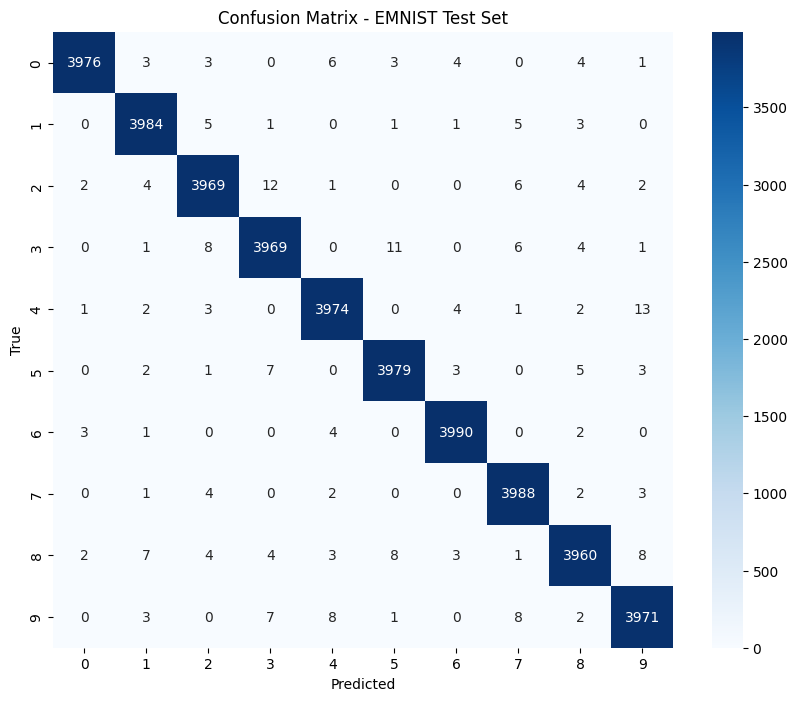


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 12.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.04      0.10      0.05      1000
           5       0.49      0.10      0.16      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.12      0.12      0.11     10000
weighted avg       0.12      0.12      0.11     10000



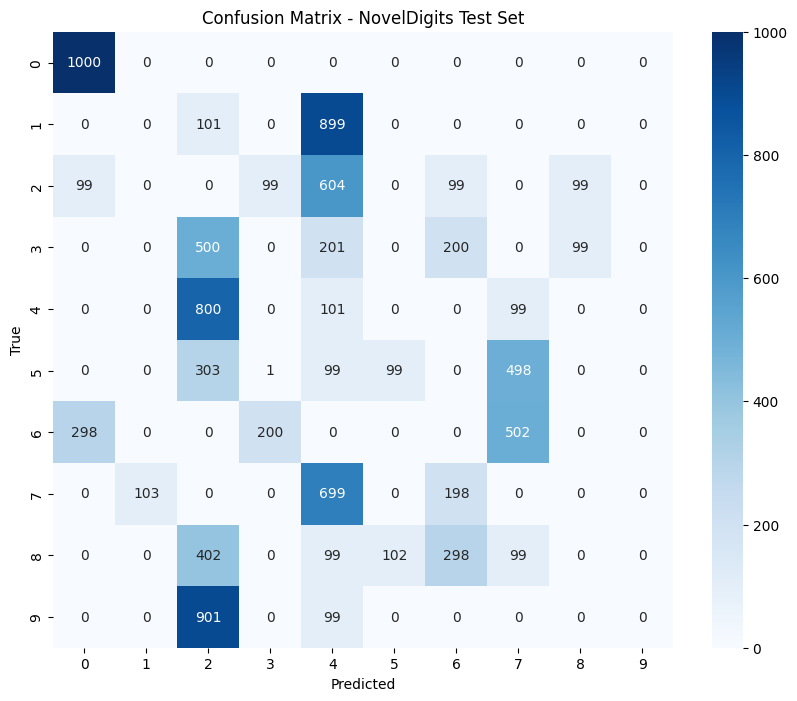


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.40%
NovelDigits Accuracy: 12.00%


In [17]:
from test import test_model

test_model("basenn_augmented")

### Test Partial CNN model (trained on augmented EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/partialcnn_augmented/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.71%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       1.00      1.00      1.00      4000
           3       1.00      1.00      1.00      4000
           4       1.00      1.00      1.00      4000
           5       1.00      1.00      1.00      4000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       1.00      1.00      1.00      4000
           9       0.99      1.00      1.00      4000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



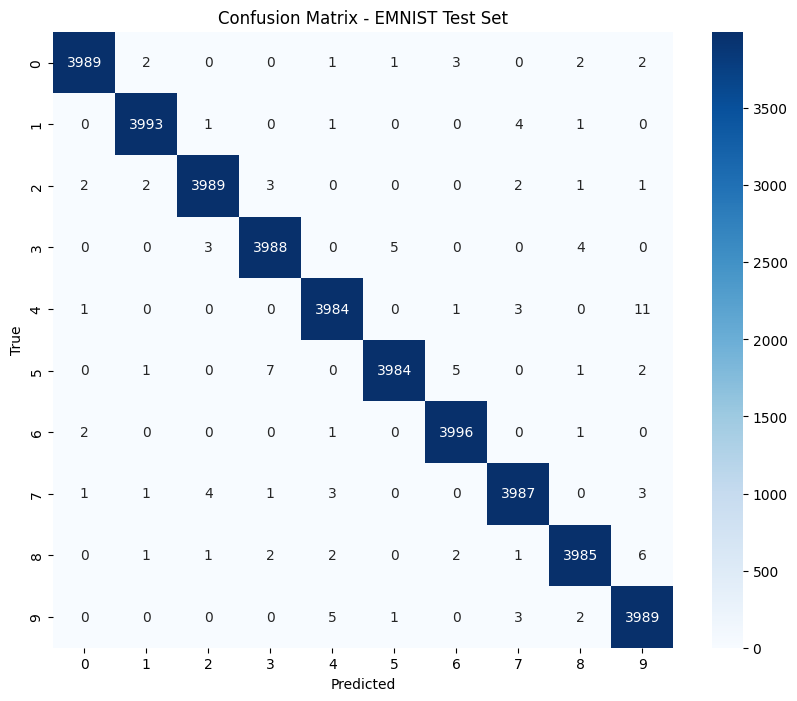


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 14.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.07      0.20      0.10      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.33      0.10      0.15      1000
           9       0.33      0.20      0.25      1000

    accuracy                           0.15     10000
   macro avg       0.12      0.15      0.11     10000
weighted avg       0.12      0.15      0.11     10000



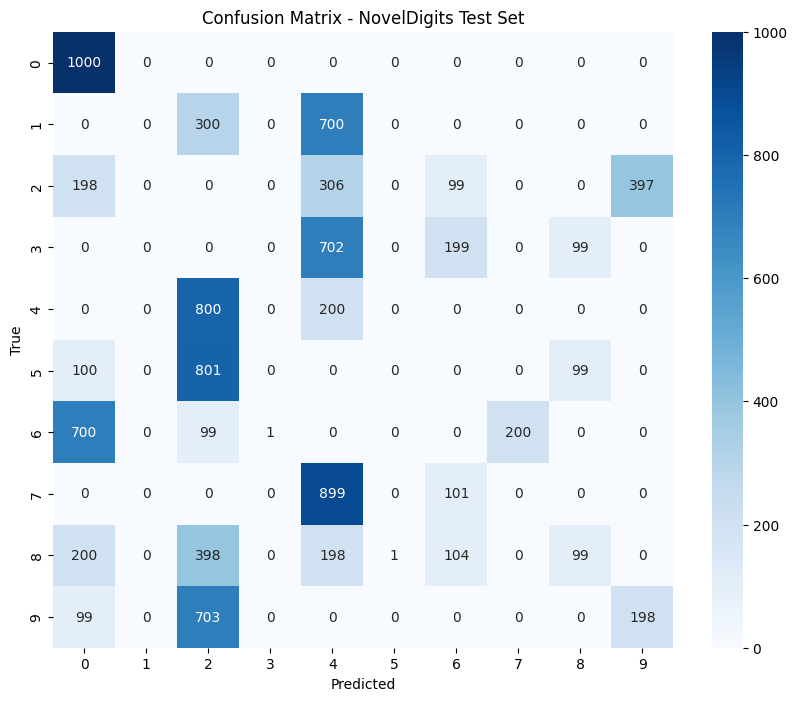


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.71%
NovelDigits Accuracy: 14.97%


In [18]:
from test import test_model

test_model("partialcnn_augmented")

### Test Full CNN model (trained on augmented EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/fullcnn_augmented/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.68%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.99      1.00      4000
           2       1.00      1.00      1.00      4000
           3       1.00      1.00      1.00      4000
           4       1.00      1.00      1.00      4000
           5       1.00      1.00      1.00      4000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       1.00      1.00      1.00      4000
           9       1.00      1.00      1.00      4000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



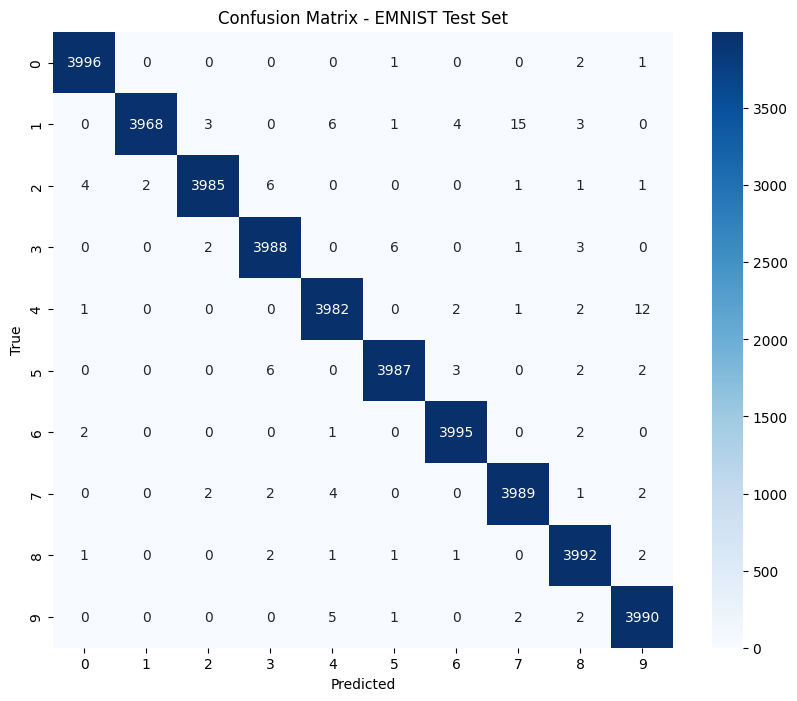


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 14.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.37      1.00      0.54      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.06      0.20      0.09      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.75      0.30      0.43      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.15     10000
   macro avg       0.12      0.15      0.11     10000
weighted avg       0.12      0.15      0.11     10000



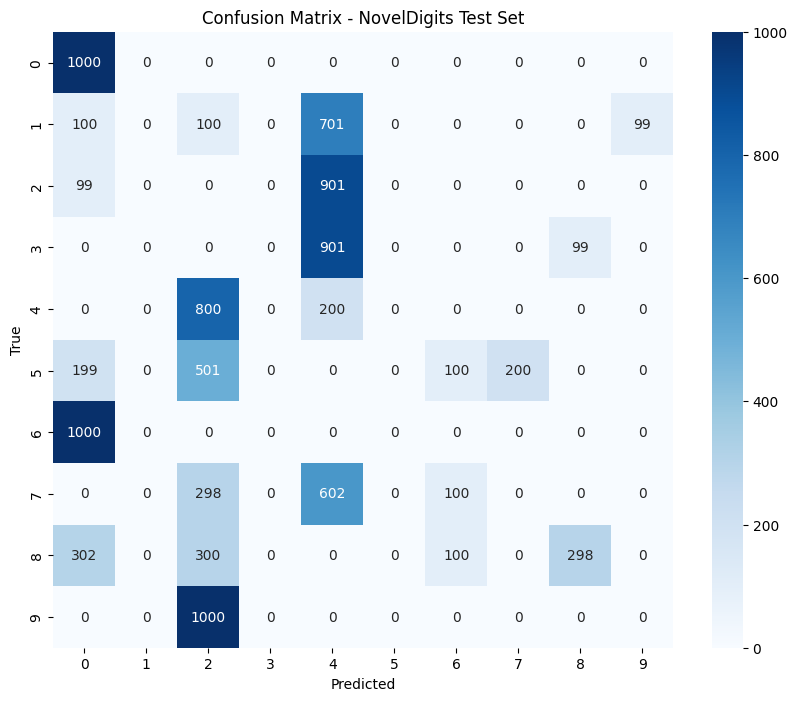


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.68%
NovelDigits Accuracy: 14.98%


In [19]:
from test import test_model

test_model("fullcnn_augmented")

### Test RNN model (trained on augmented EMNIST) on EMNIST and novel datasets

Using device: cuda

Loading model from trained_models/rnn_augmented/model.pt...

Loading datasets...

EMNIST Test Set Results:
--------------------------------------------------
Accuracy: 99.64%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       1.00      1.00      1.00      4000
           3       1.00      1.00      1.00      4000
           4       1.00      1.00      1.00      4000
           5       1.00      0.99      1.00      4000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       0.99      0.99      0.99      4000
           9       0.99      1.00      1.00      4000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



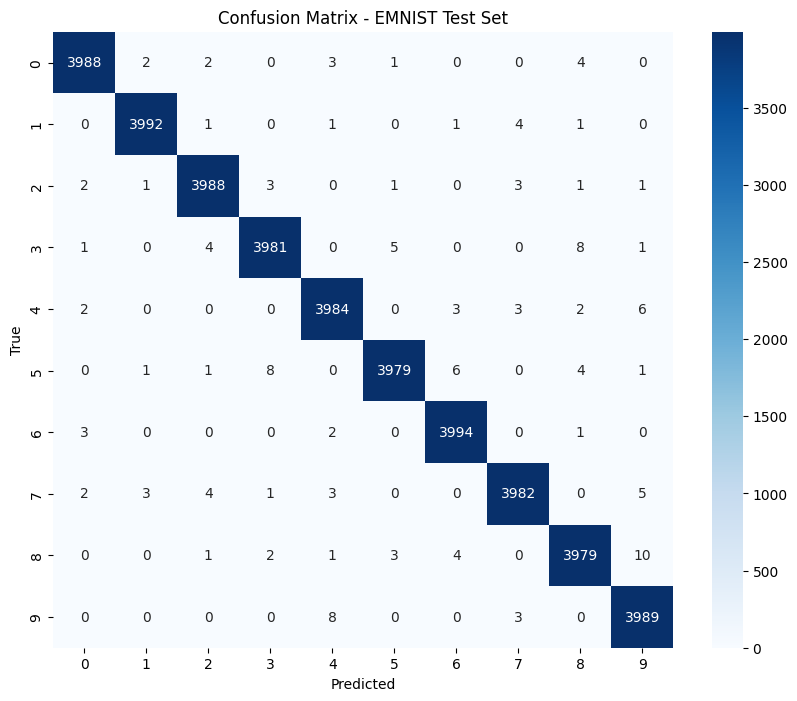


NovelDigits Test Set Results:
--------------------------------------------------
Accuracy: 12.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.31      1.00      0.48      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.03      0.10      0.05      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.67      0.20      0.31      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.13     10000
   macro avg       0.10      0.13      0.08     10000
weighted avg       0.10      0.13      0.08     10000



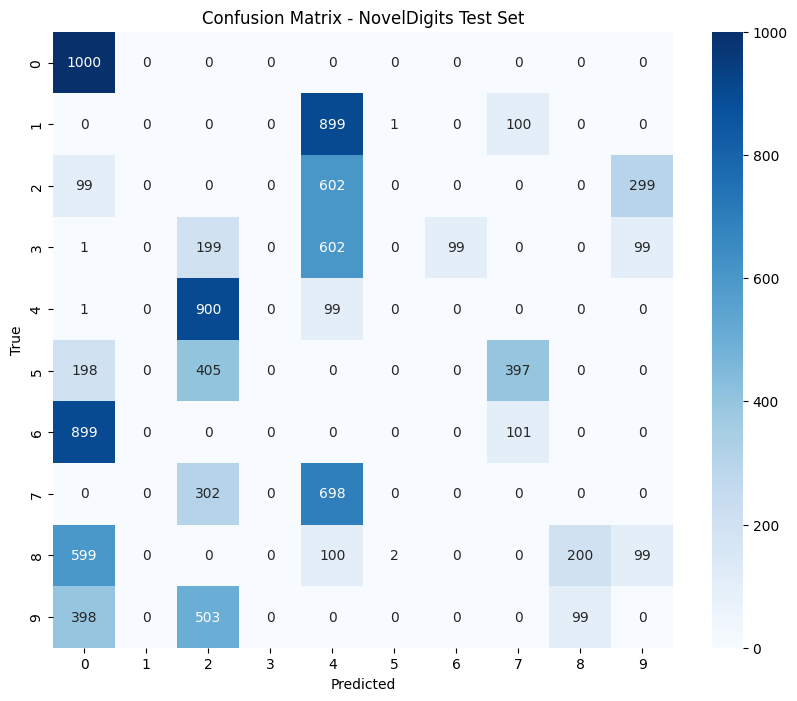


Final Results:
--------------------------------------------------
EMNIST Accuracy: 99.64%
NovelDigits Accuracy: 12.99%


In [20]:
from test import test_model

test_model("rnn_augmented")